* SeniorCitizen : 고령자 여부
* tenure : 서비스에 가입한 기간

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
# 데이터 로드
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# info로 데이터타입, 결측치 등 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# TotalCharges 가 수치 타입이 아니기 때문에 수치 연산을 위해 숫자 형태로 변경합니다.
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
# df = df.dropna()

In [ ]:
# TotalCharges가 float형일 경우 0인 값을 못찾아서 int형으로 바꿈
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce').fillna(0).astype(object)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [ ]:
# 수치데이터에 대한 요약 보기
df.describe(include='number')

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.265086
std,24.559481,30.090047,2266.790864
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.000000
50%,29.000000,70.350000,1394.000000
75%,55.000000,89.850000,3786.500000
max,72.000000,118.750000,8684.000000


In [ ]:
# TotalCharges의 min이 0 => 0도 결측치가 아닐까?
# 0 -> NaN
df_null_1 = df['TotalCharges'].replace(0.0, np.nan)
df_null = df_null_1.isnull()
df_null.sum()

11

In [ ]:
# tenure도 0이 결측치일 수 있으니 확인
df_null_2 = df['tenure'].replace(0.0, np.nan)
df_null = df_null_2.isnull()
df_null.sum()

11

In [ ]:
# df["tenure"].isnull().index == df["TotalCharges"].isnull().index
df_null_1.index == df_null_2.index

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# TotalCharges와 tenure의 결측치 수(=0)가 같으므로 확인
a = (df_null_1.index == df_null_2.index)
if a.all():
    print("모두 True입니다.")

모두 True입니다.


In [ ]:
# 정답값인 Churn의 개수 확인
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
# Churn의 값을 Yes, No가 아닌 0,1로 만들기
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

In [ ]:
df_0 = df[df["Churn"] == 0]
df_1 = df[df["Churn"] == 1]
df_0.shape, df_1.shape

((5174, 20), (1869, 20))

0 tenure 0
1 MonthlyCharges 1


<ipython-input-129-1f115ff300bc>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name], ax=axes[col], label='No Churn')
<ipython-input-129-1f115ff300bc>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[col_name], ax=axes[col], label='Churn')
<ipython-input-129-1f115ff300bc>:12: 

2 TotalCharges 2


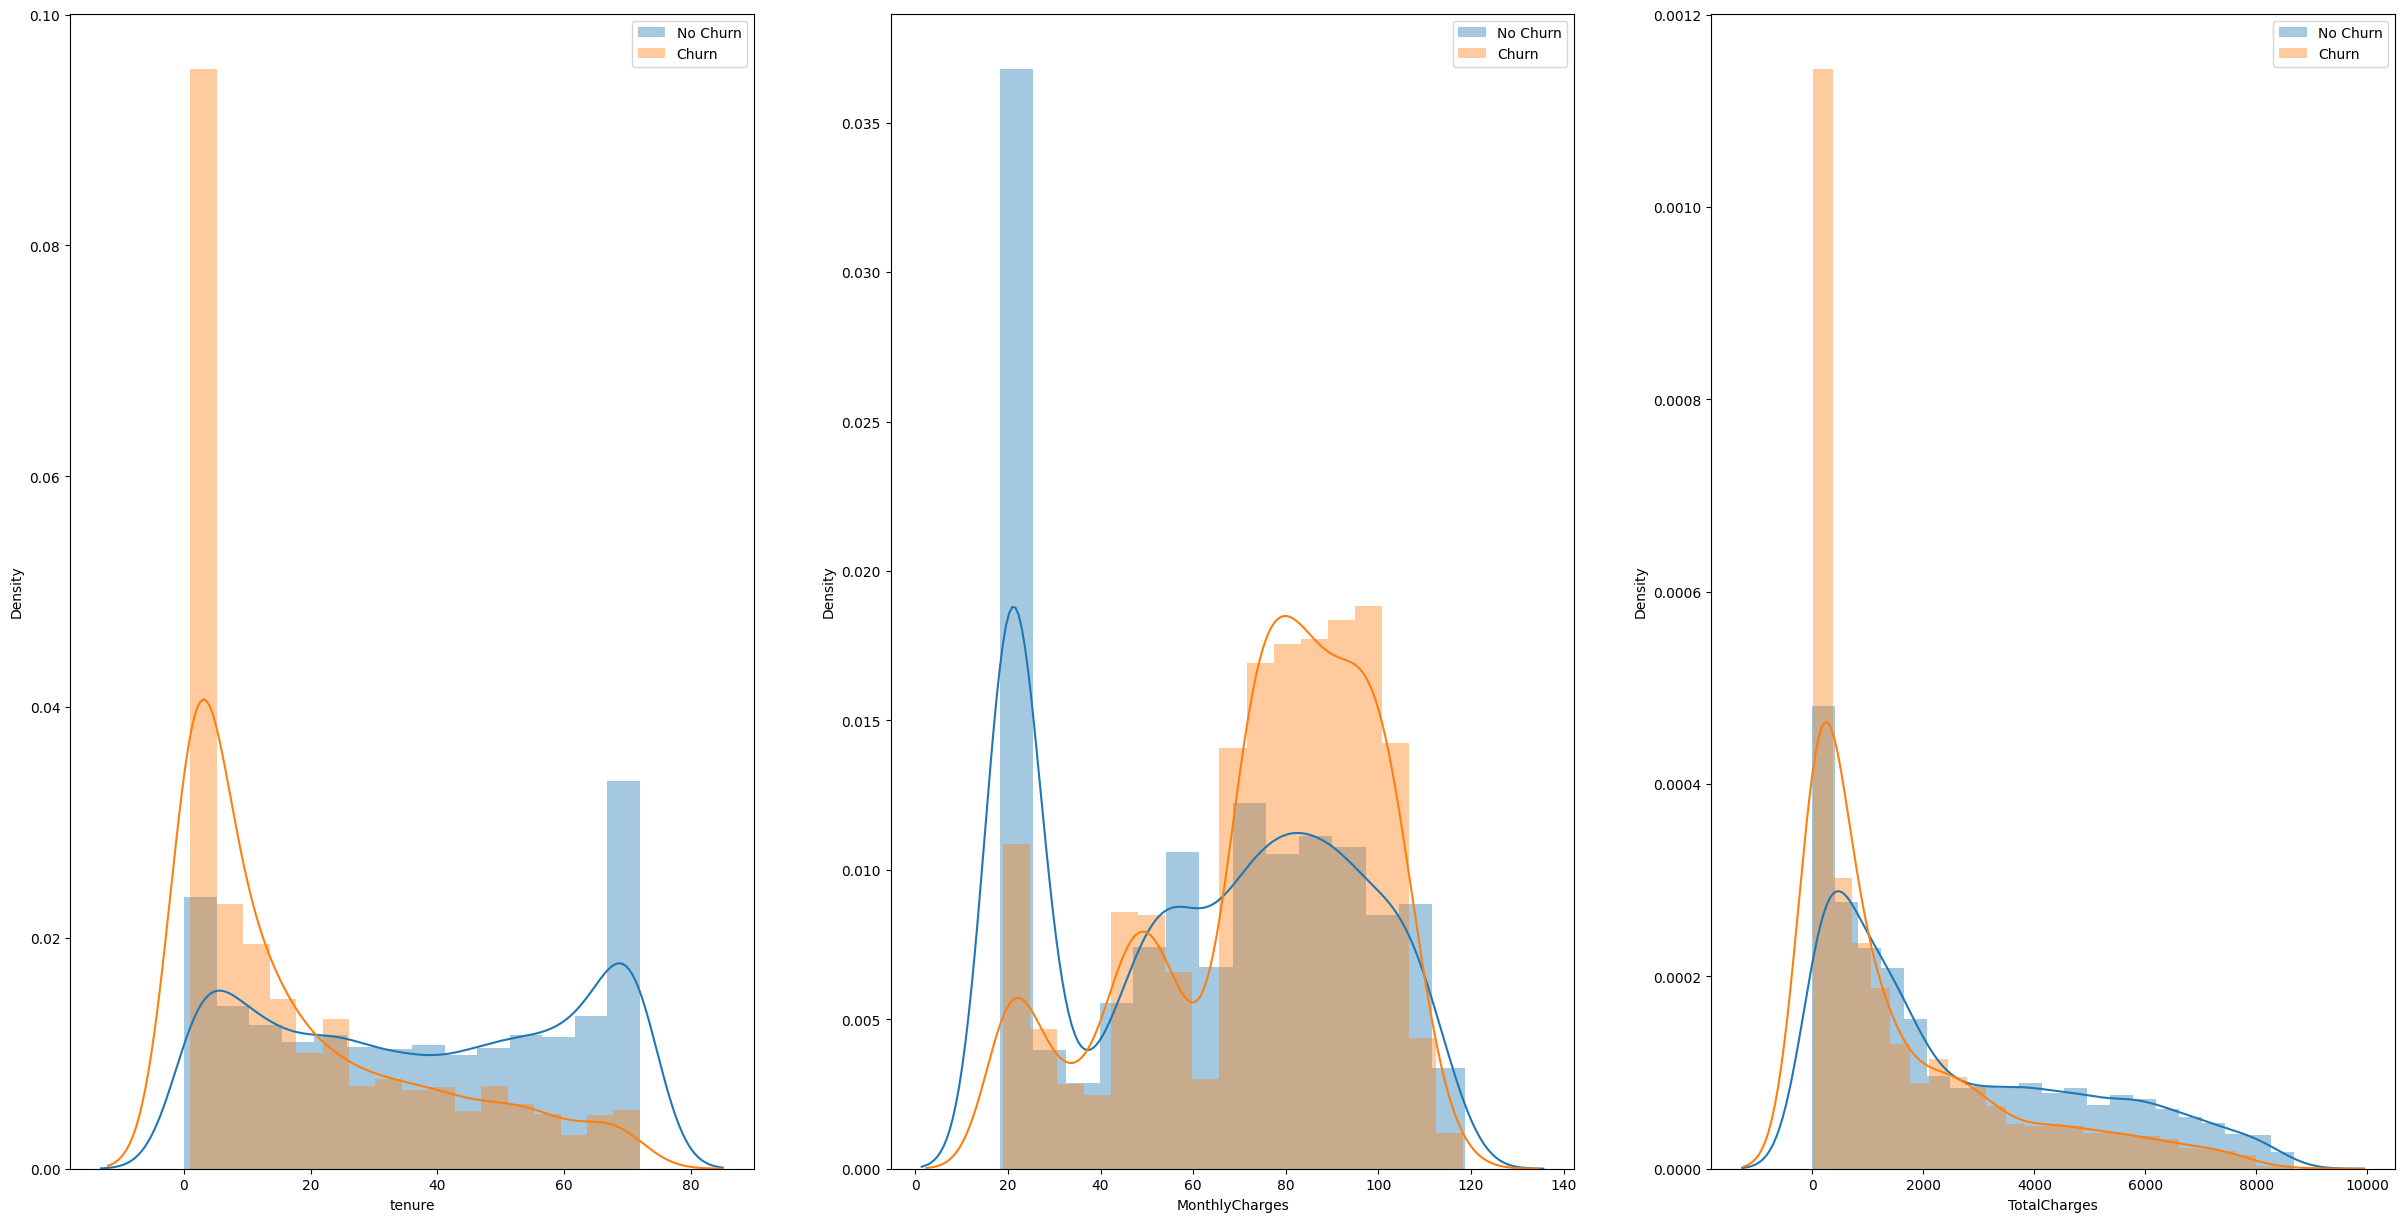

In [ ]:
# distplot 으로 서브플롯을 그리고 전체적인 모습 확인해보기
cols = ["tenure",	"MonthlyCharges",	"TotalCharges","Churn"]

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,15))

for i, col_name in enumerate(cols[:-1]):
    col = i % 3
    print(i, col_name, col)
    sns.distplot(df_0[col_name], ax=axes[col], label='No Churn')
    sns.distplot(df_1[col_name], ax=axes[col], label='Churn')
    axes[col].legend()

In [ ]:
# tenure와 Churn 비교해보기
df.groupby(["tenure"])["Churn"].mean()

tenure
0     0.000000
1     0.619902
2     0.516807
3     0.470000
4     0.471591
        ...   
68    0.090000
69    0.084211
70    0.092437
71    0.035294
72    0.016575
Name: Churn, Length: 73, dtype: float64

In [ ]:
# 두개의 컬럼과 관련된 데이터 프레임 만들어보기
df_tc = df.groupby(["tenure"])["Churn"].agg(["mean","count"]).reset_index()
df_tc

,tenure,mean,count
0,0,0.000000,11
1,1,0.619902,613
2,2,0.516807,238
3,3,0.470000,200
4,4,0.471591,176
...,...,...,...
68,68,0.090000,100
69,69,0.084211,95
70,70,0.092437,119
71,71,0.035294,170


<Axes: >

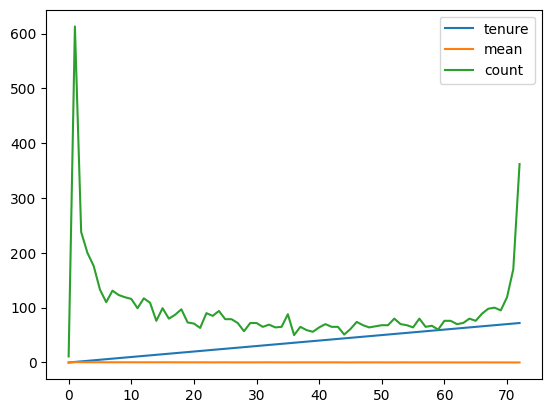

In [ ]:
# plot() 을 이용해 한눈에 확인해보기
df_tc.plot()

<Axes: xlabel='tenure', ylabel='count'>

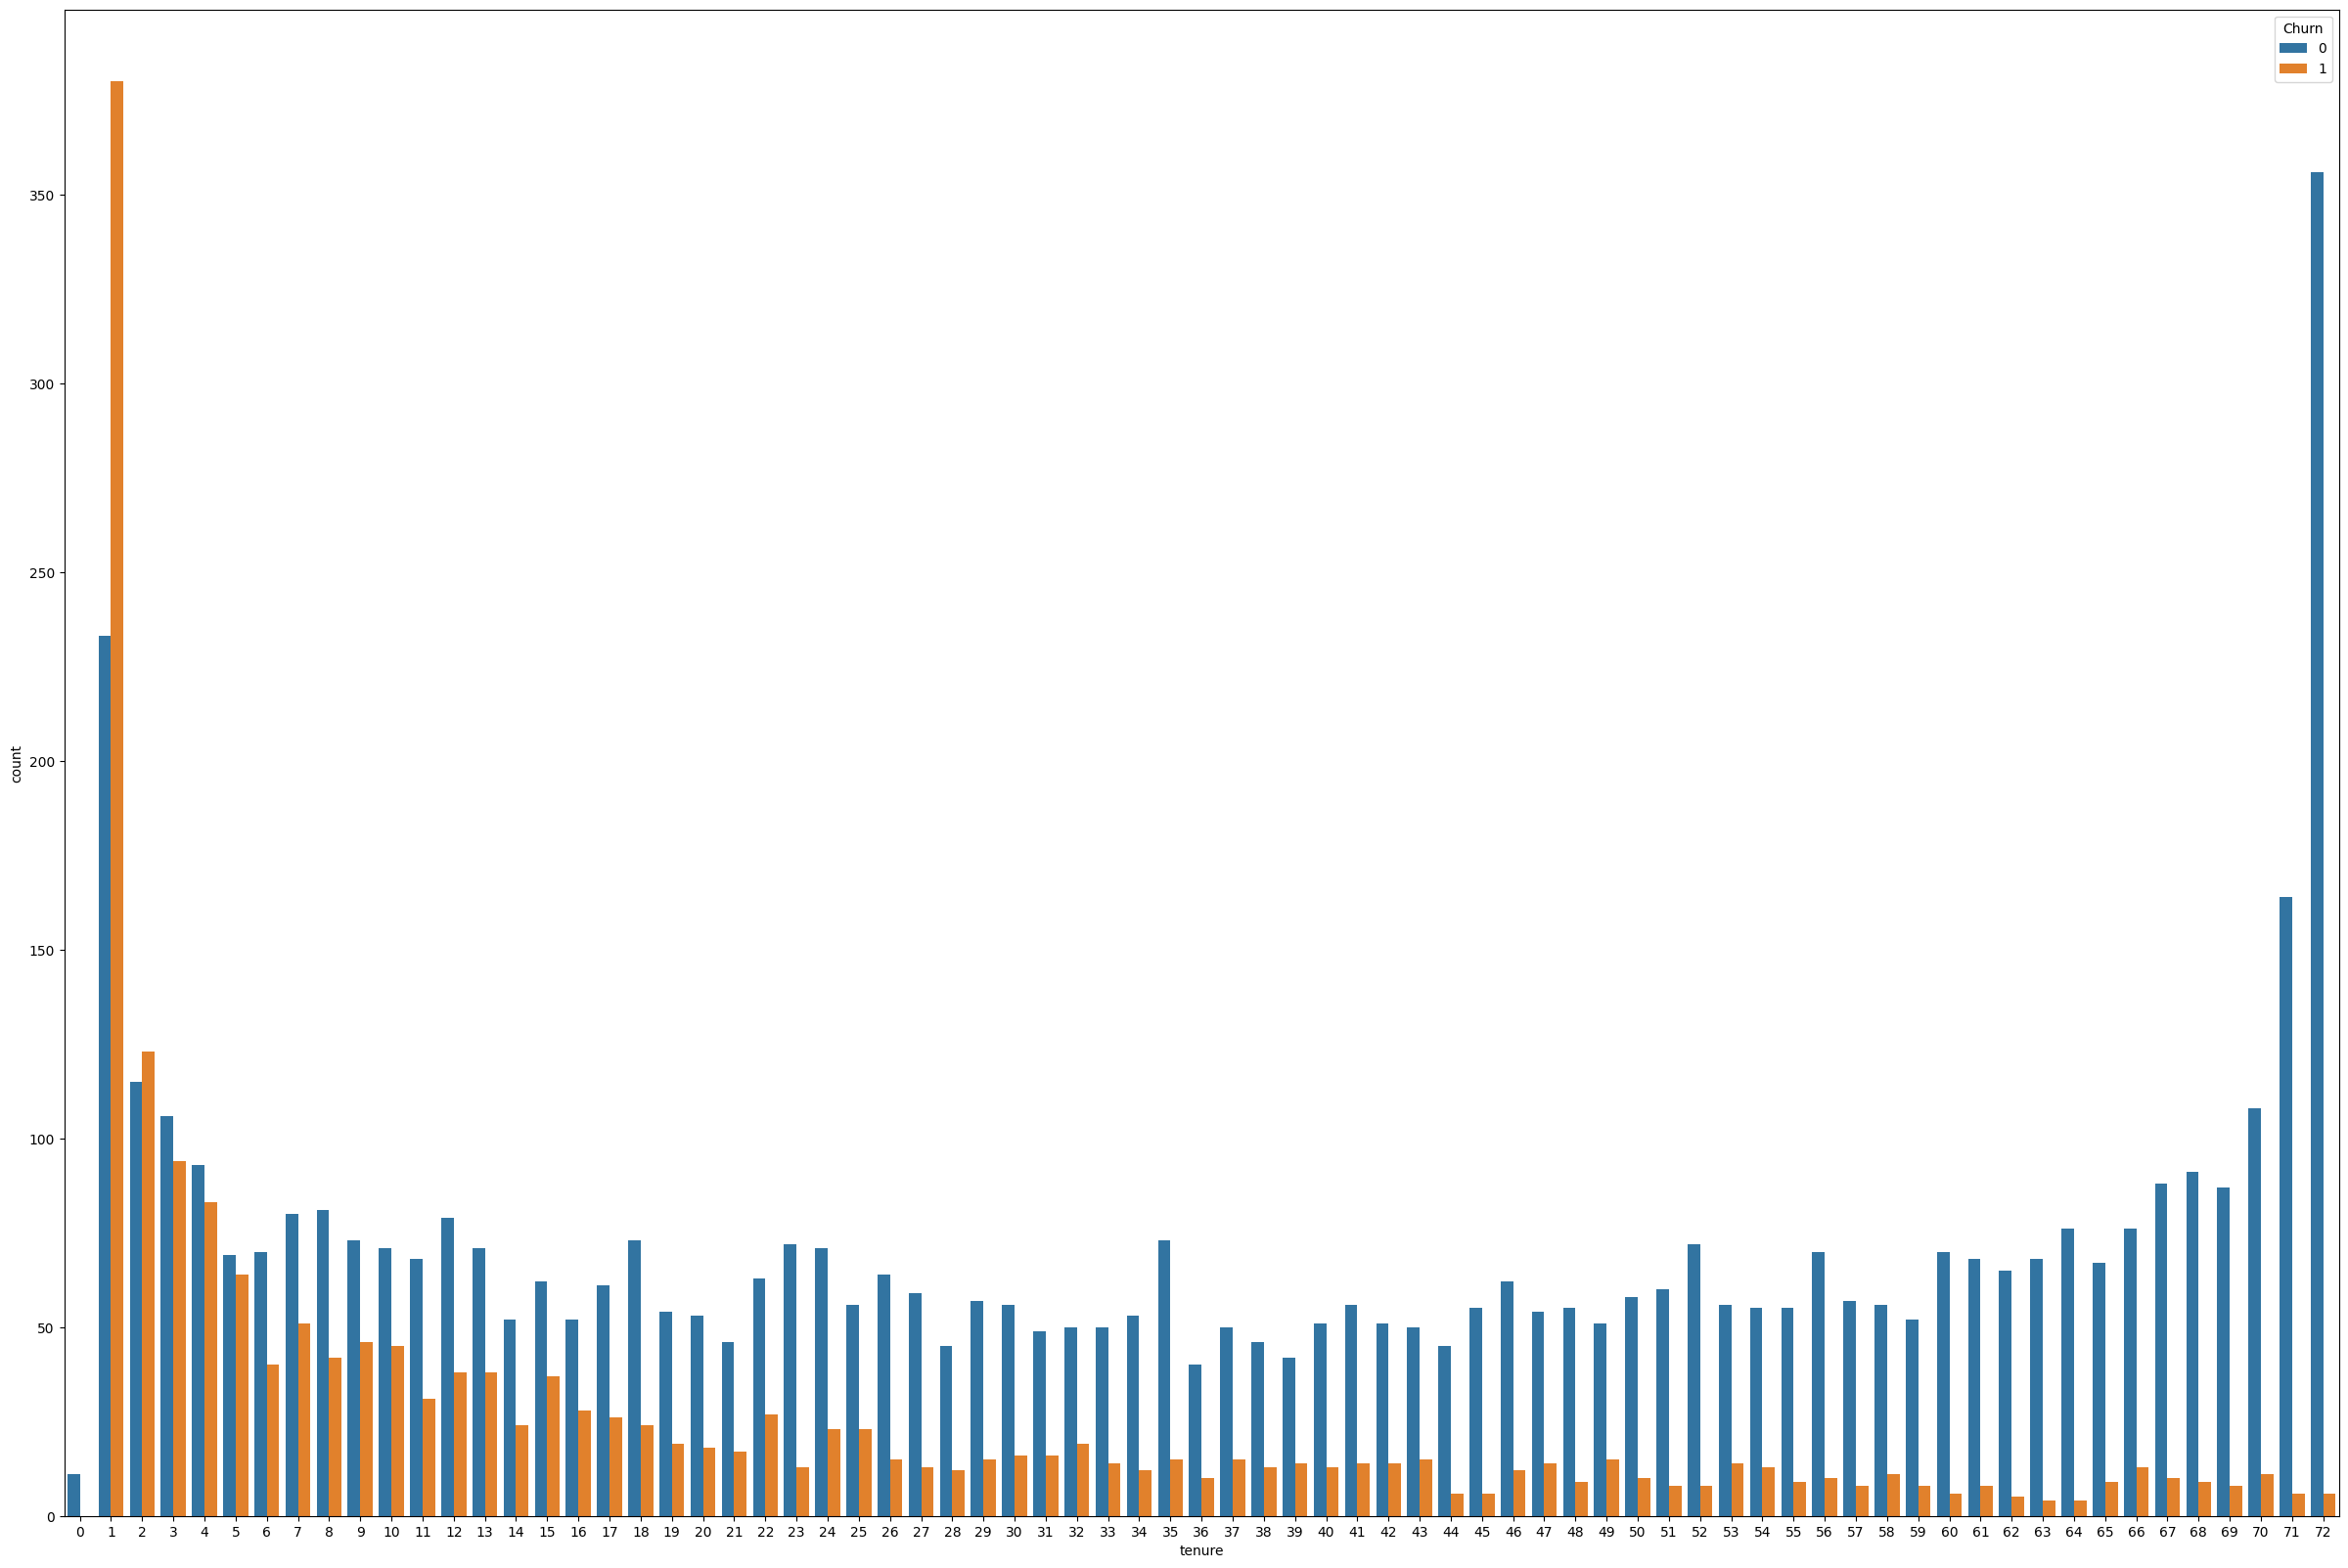

In [ ]:
# 위의 plot보단 아래의 countplot의 결과가 tenure가 클수록 Churn이 적다는 사실이 한눈에 보인다.
plt.figure(figsize=(30,20))
sns.countplot(data=df, x="tenure", hue="Churn")

<Axes: xlabel='tenure', ylabel='TotalCharges'>

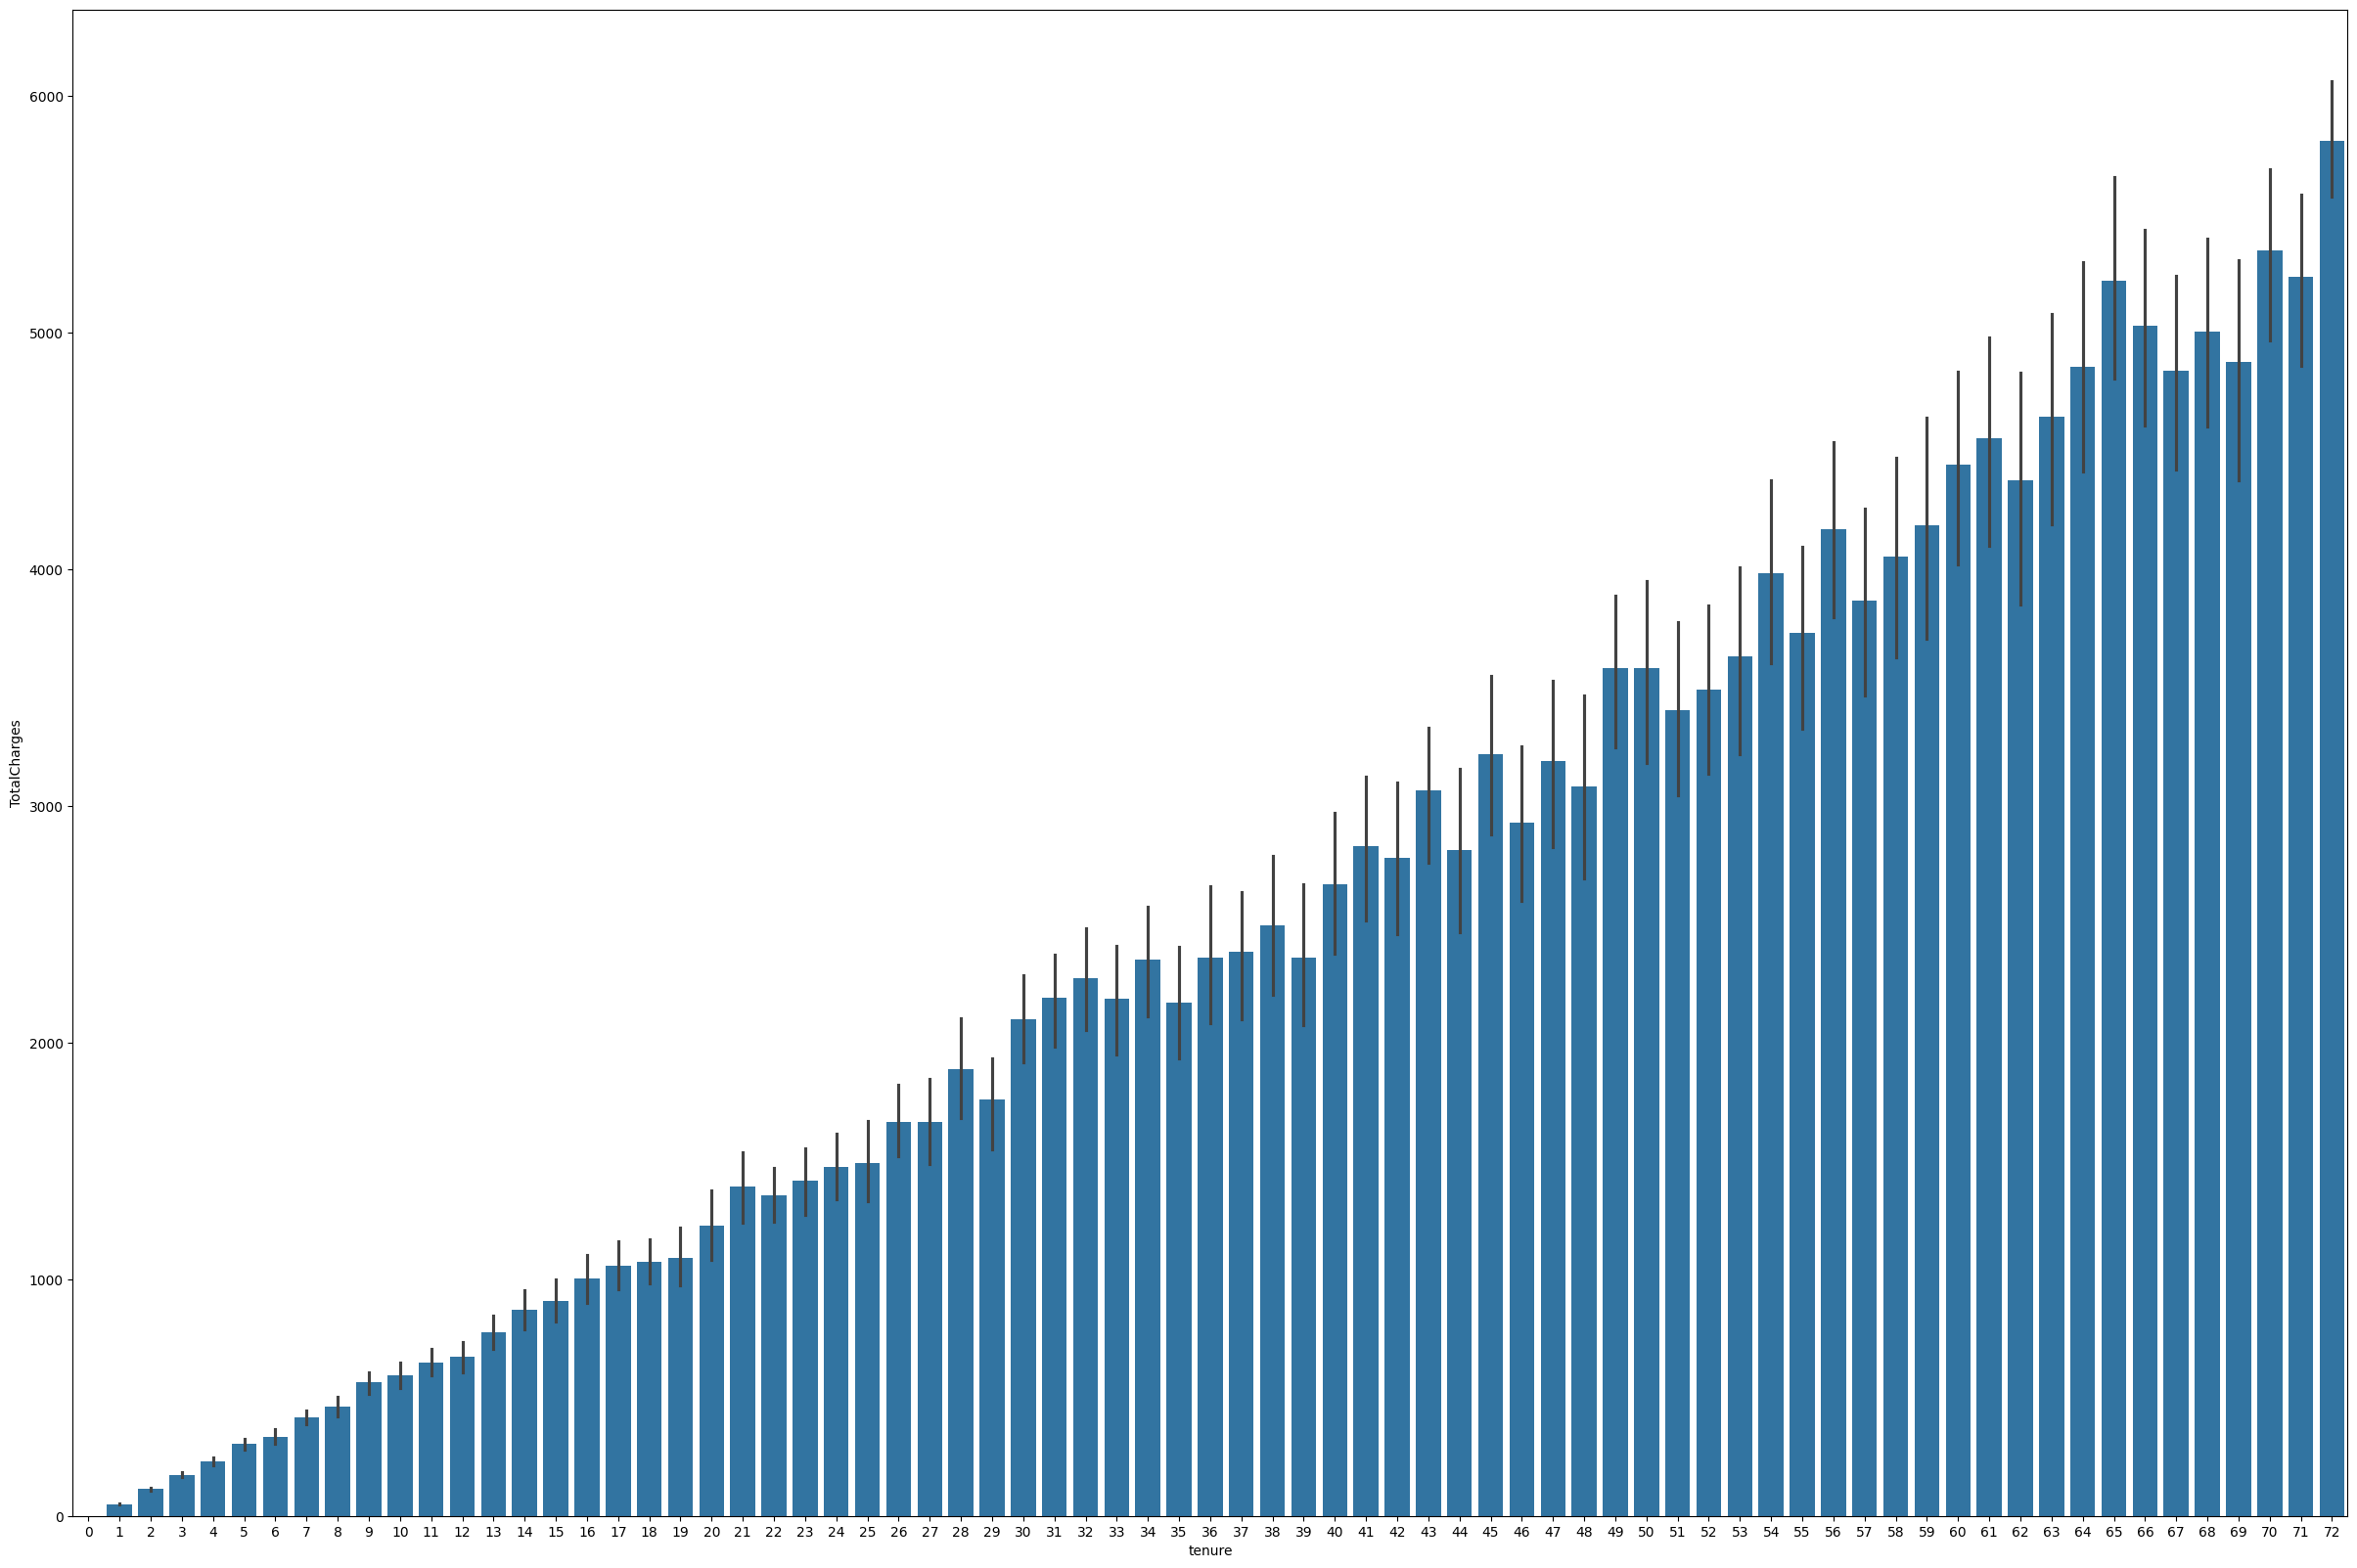

In [ ]:
# 위에서 tenure와 TotalCharges는 연관되어있다는 가설.
# 따라서 이번엔 barplot으로 두 컬럼 간의 기울기를 확인
plt.figure(figsize=(30,20))
sns.barplot(data=df, x="tenure", y="TotalCharges")

<Axes: xlabel='tenure', ylabel='TotalCharges'>

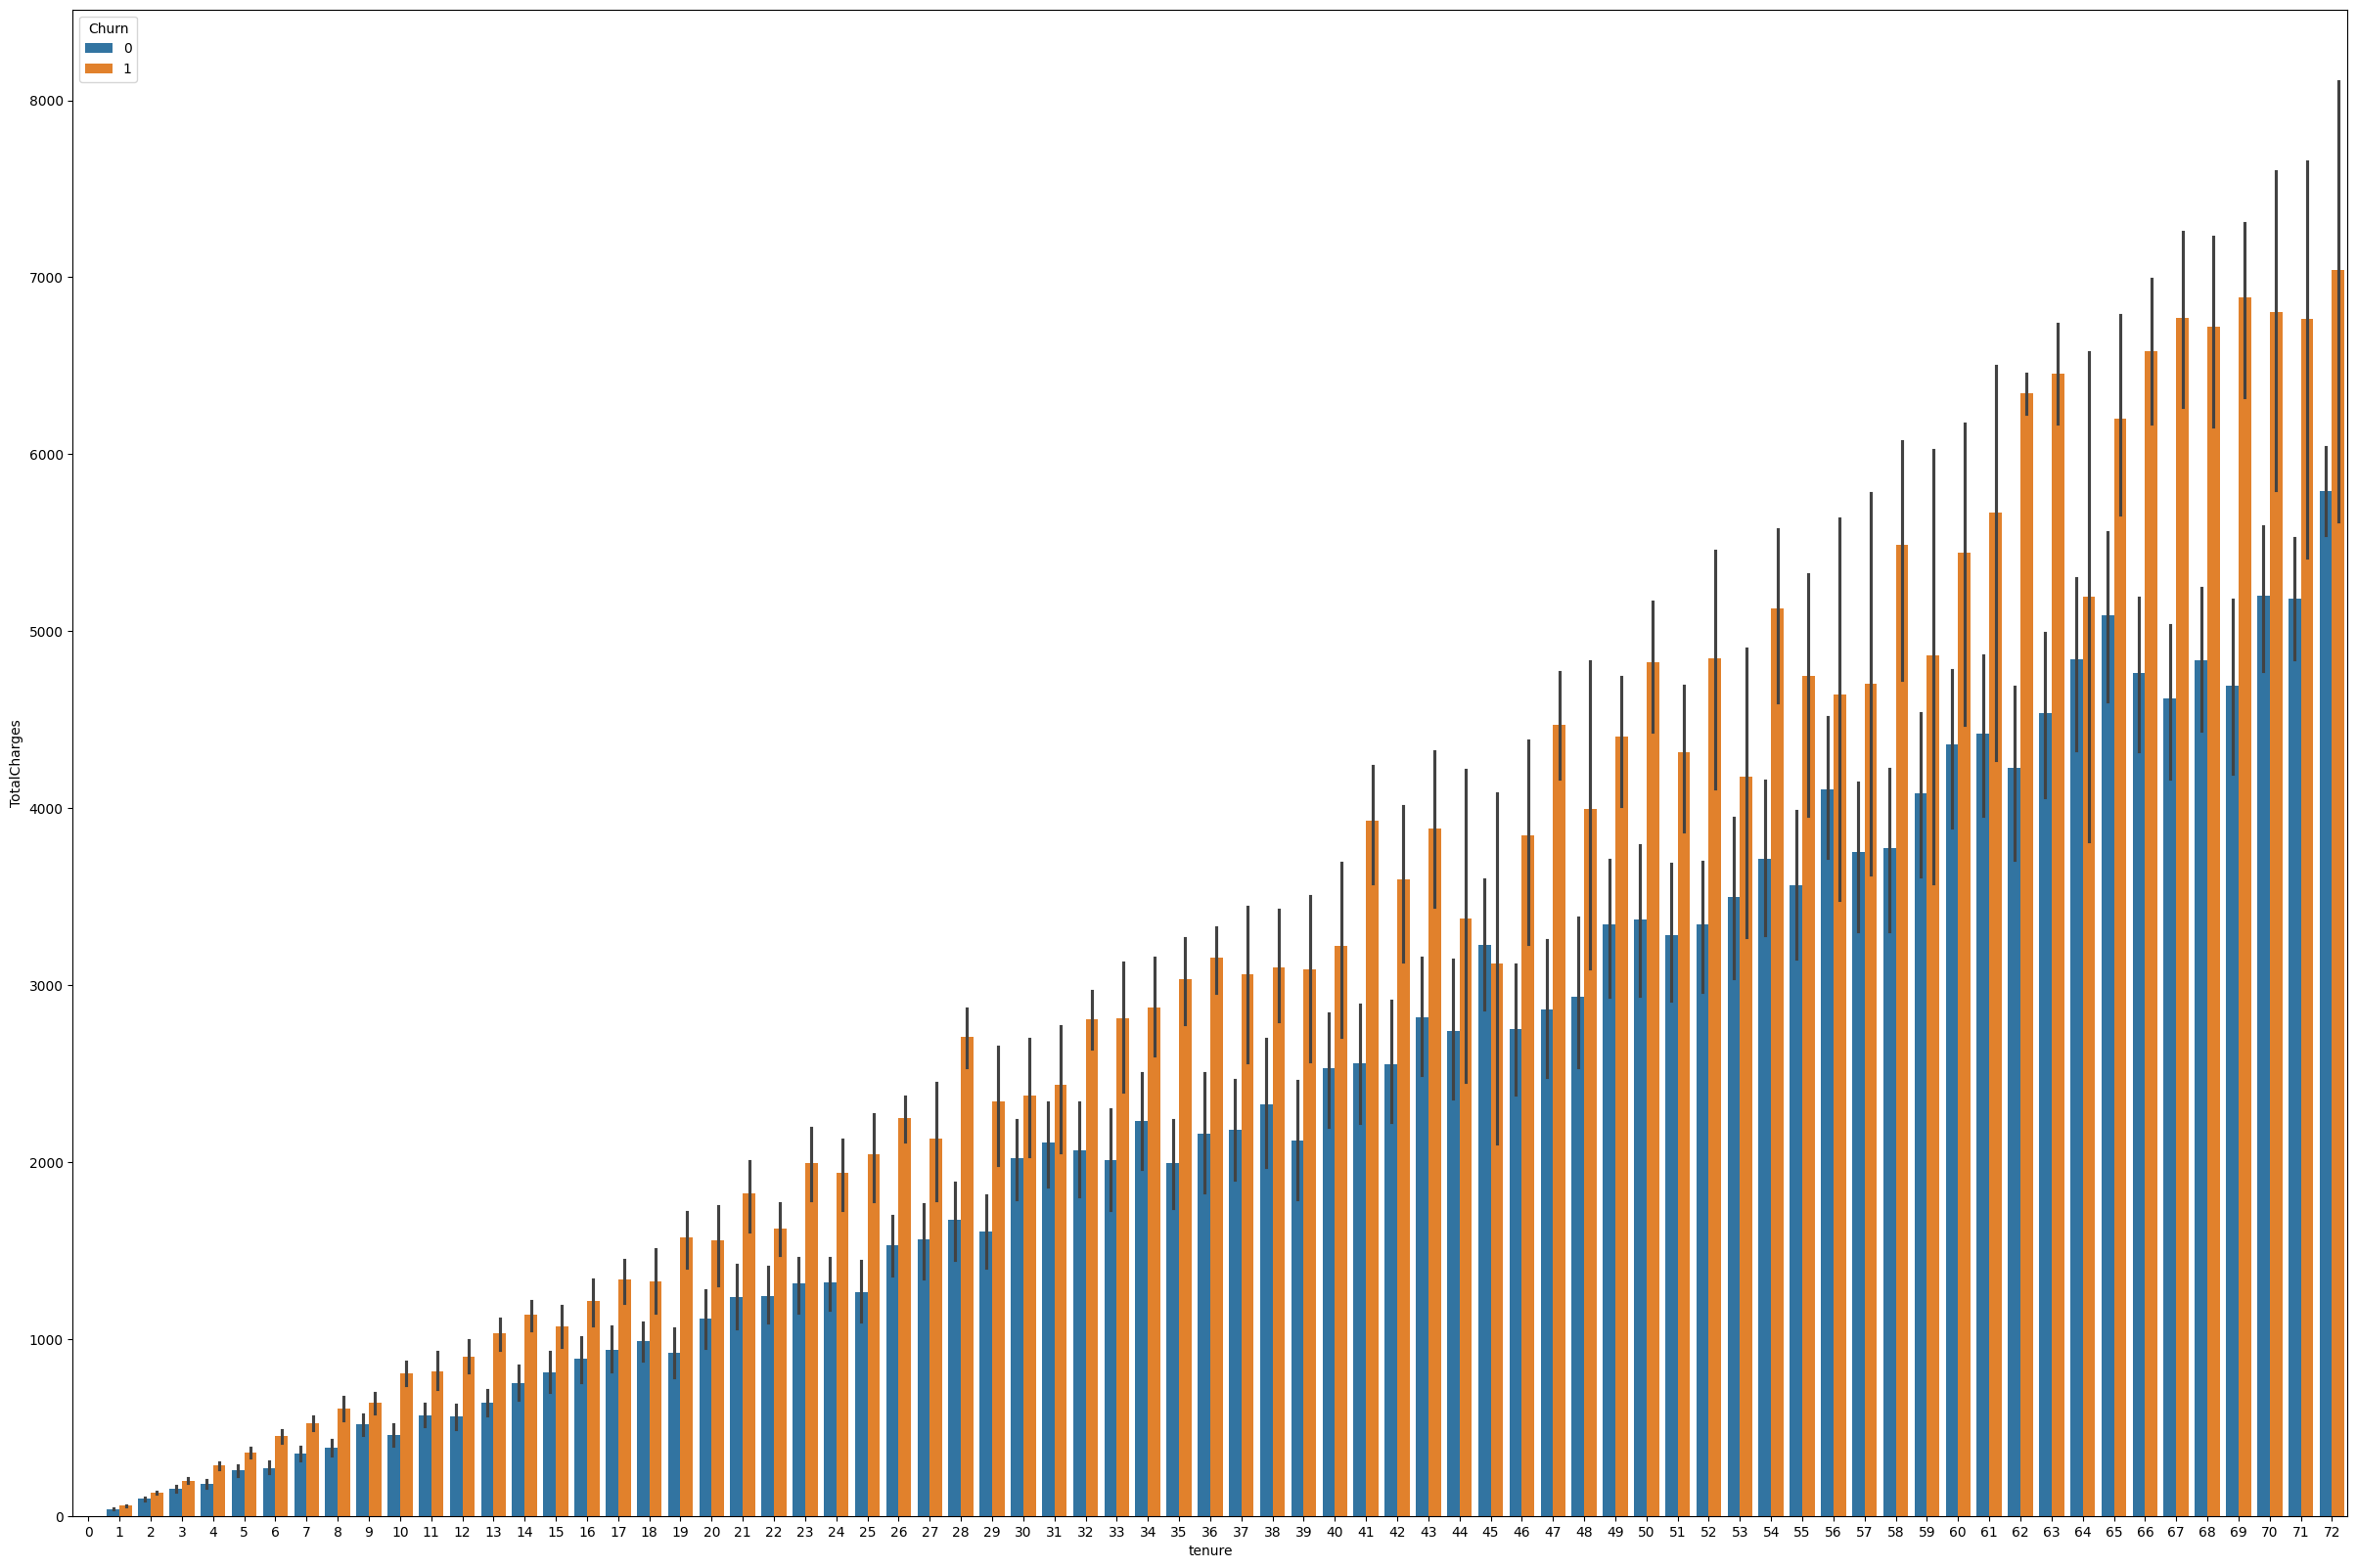

In [ ]:
# 이번엔 Churn을 추가하여 시각화하였는데, 언제나 Churn이 1인 경우가 0인 경우보다 더 크게 나오는 모습을 보인다.
# ==> 기간이 길어질 수록 가격이 오르고, 결국엔 탈출?
plt.figure(figsize=(30,20))
sns.barplot(data=df, x="tenure", y="TotalCharges", hue="Churn")

In [ ]:
feature_columns = df.columns.tolist()
feature_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
le = LabelEncoder()

for column in feature_columns:
  df[column] = le.fit_transform(df[column])

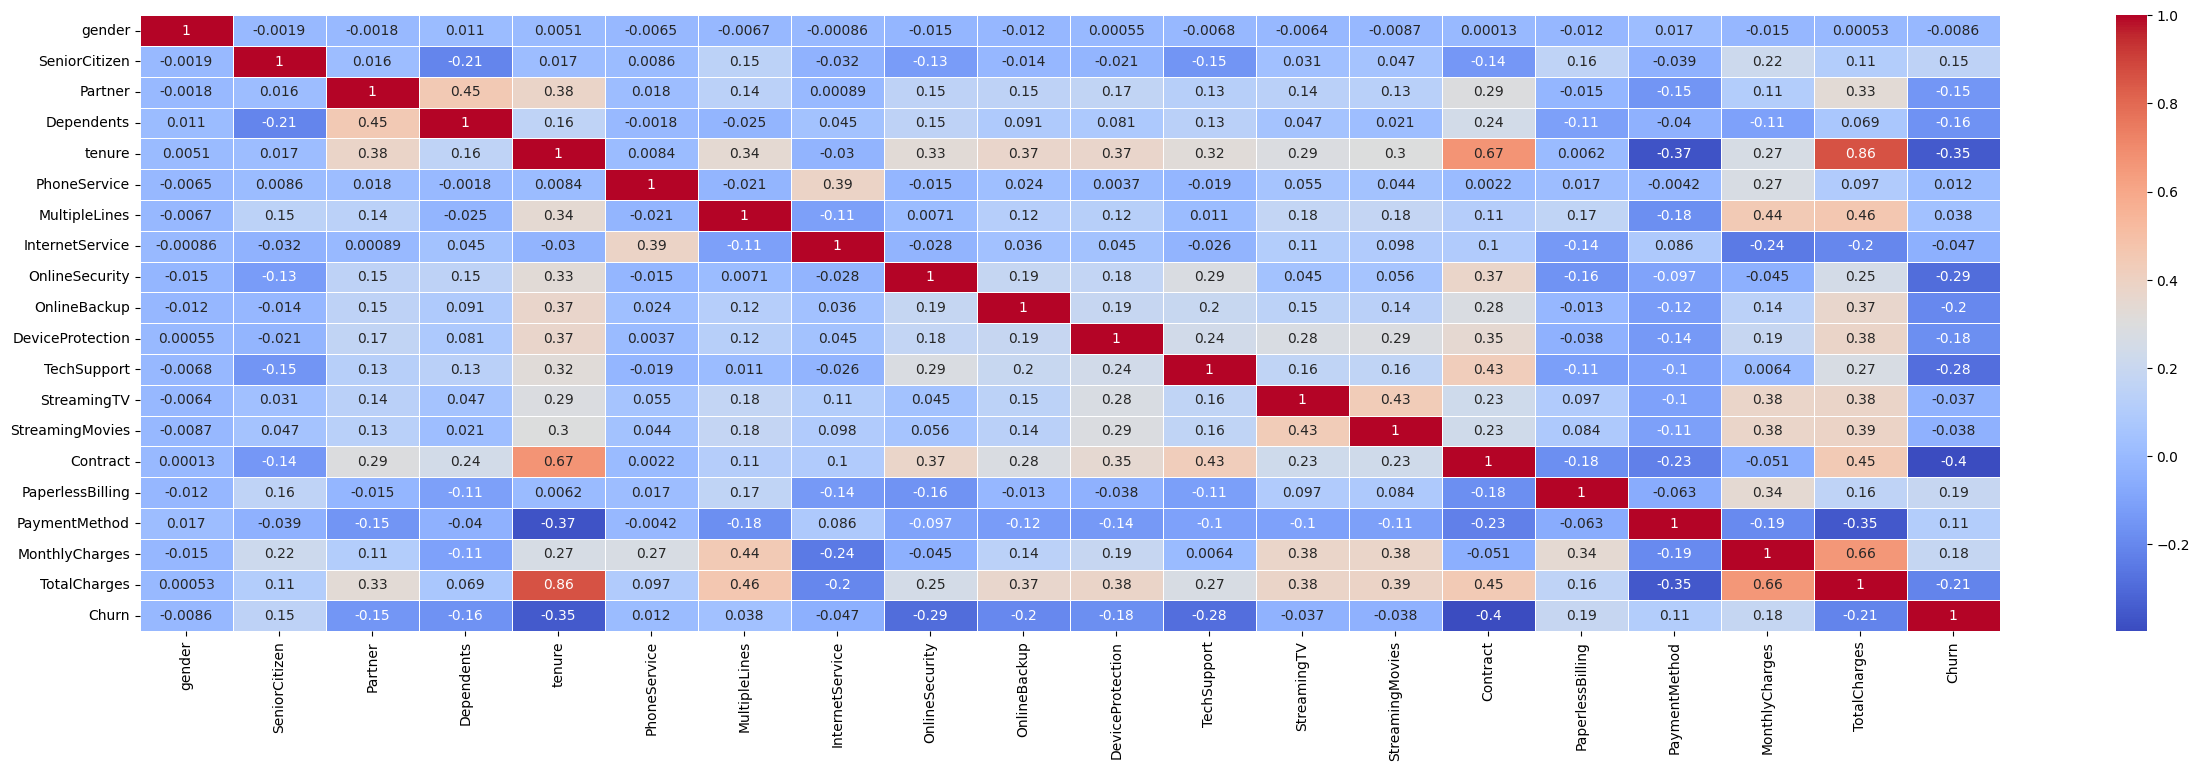

In [ ]:
# 상관관계 확인해보기
plt.figure(figsize=(30, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap='coolwarm')
plt.show()

* tenure와 TotalCharges의 상관관계는 0.86이다.

    => 매우 연관이 있다.
* 또한 생각지 못했던 Contract와 tenure의 관계도 알 수 있었다.
* Churn 과 Warm한 색을 가진 컬럼이 존재하지 않는다.

    => 범주형을 이용해보기